In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', weight='normal')

<Figure size 640x480 with 0 Axes>

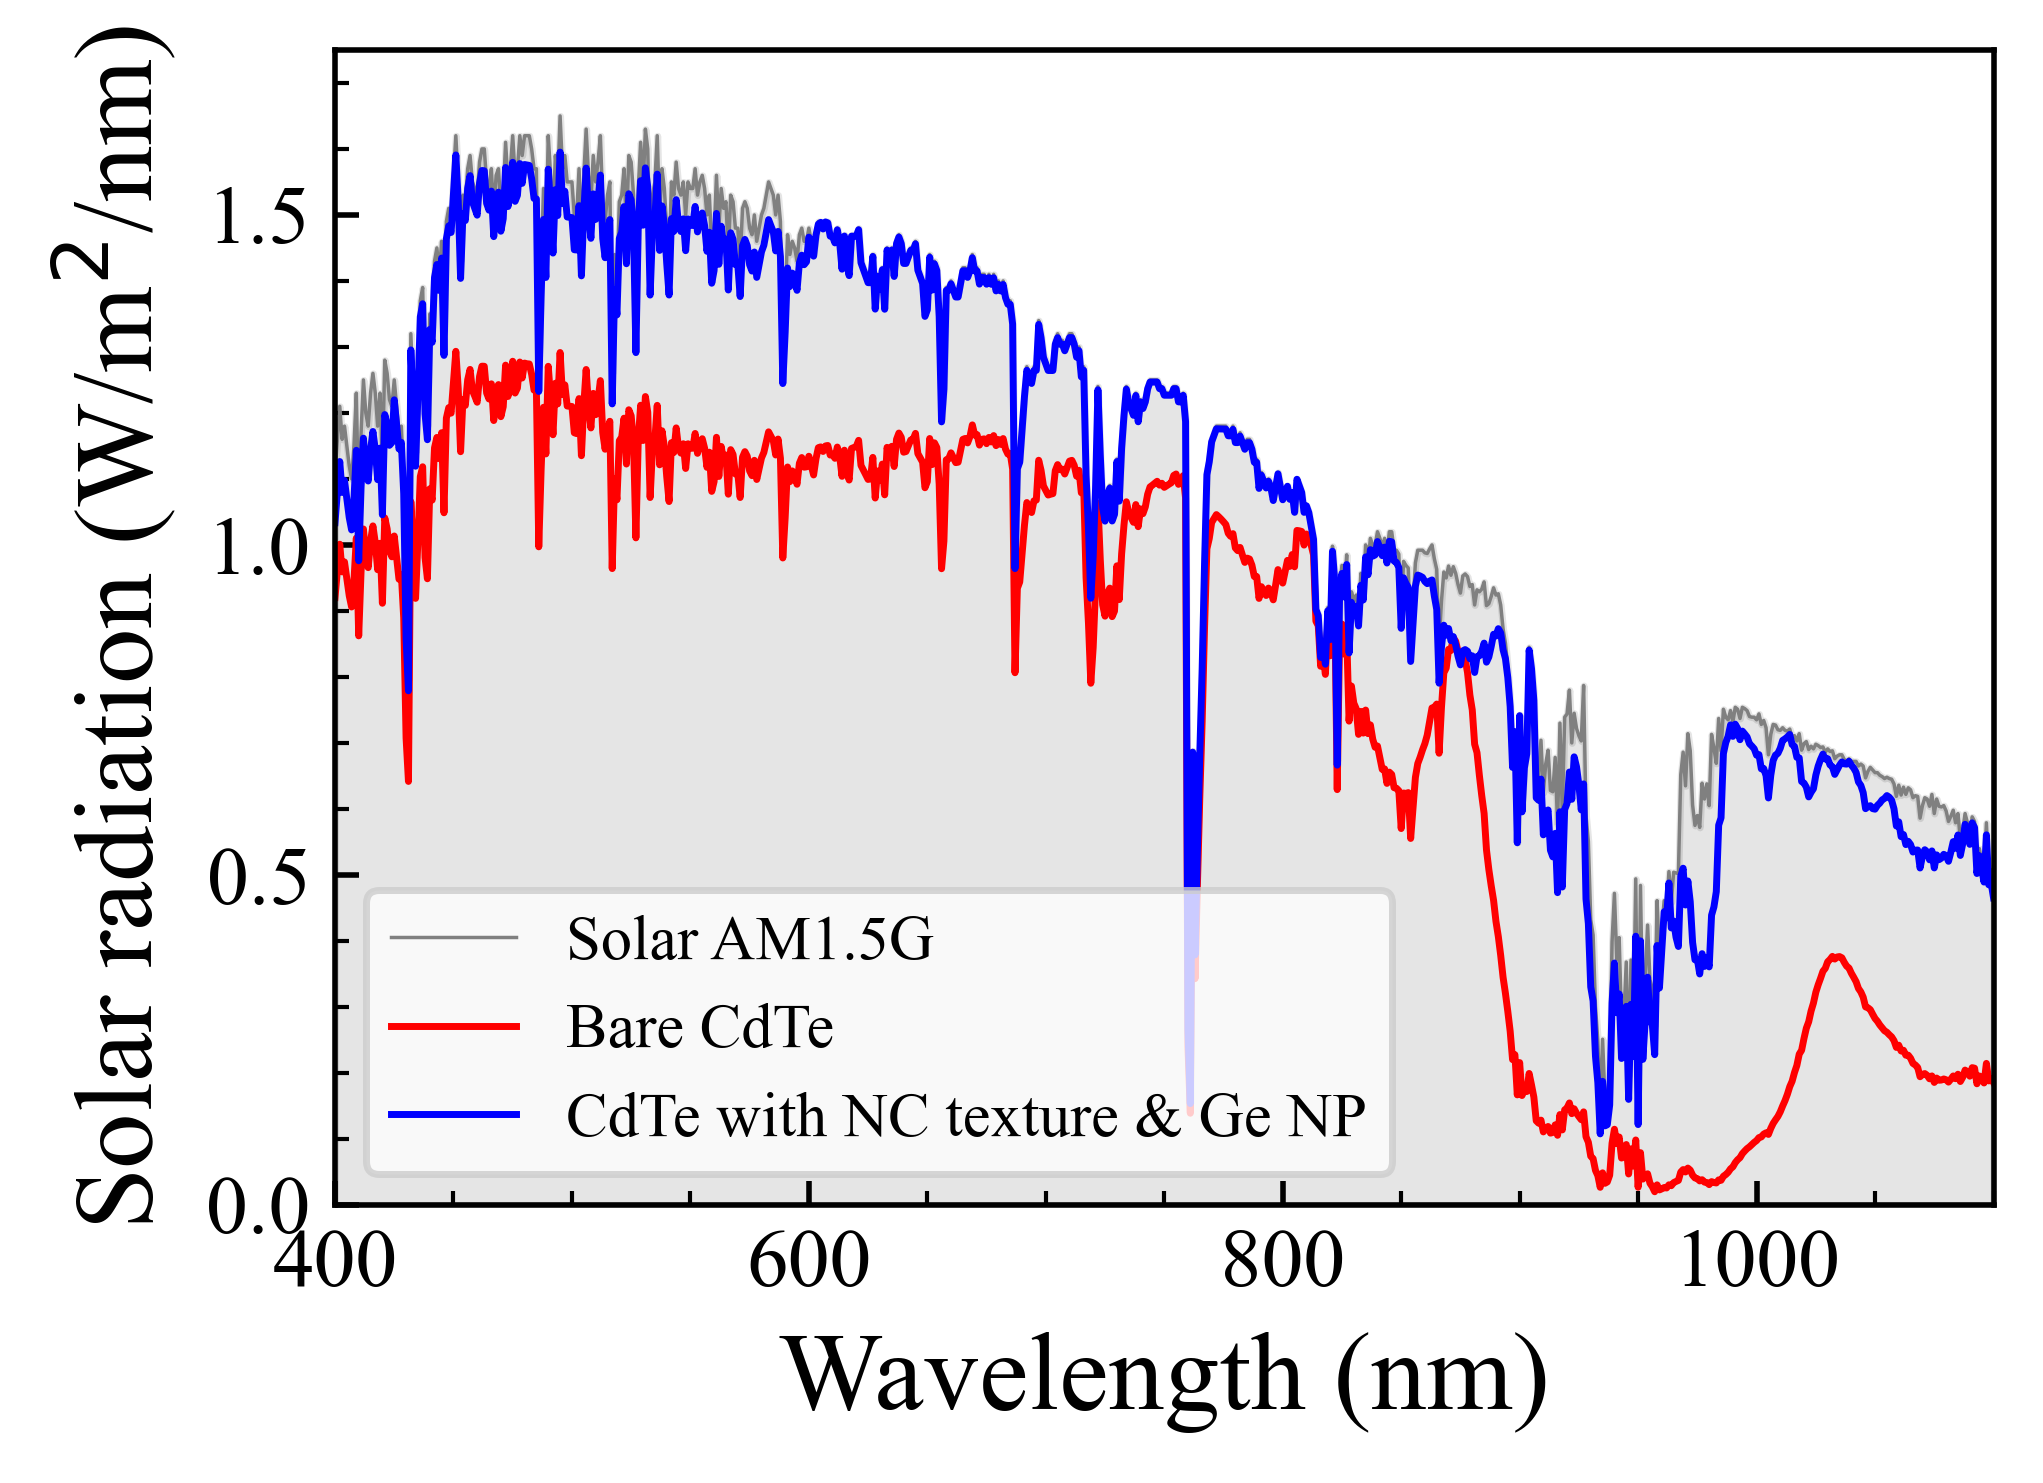

In [2]:
# Load MATLAB data file
abs_file = h5py.File('COMBINED.mat')
spectrum_file = h5py.File('spectrum data.mat')


# Extract data from file and assign to variables
wavelength = spectrum_file['lambda'][:]
solar_spectrum = spectrum_file['ssp'][:]
A1 = abs_file['A_bare'][:]
A2 = abs_file['A_stnp'][:]


wavelength_with_index_number = spectrum_file['lambda'][:]   #look for index number for a particular wavelength

# Transpose the array
wavelength = wavelength.T
solar_spectrum = solar_spectrum.T
A1 = A1.T
A2 = A2.T

wavelength = wavelength[240:941, 0]             #400nm and 1100nm have a index number of 240 and 941 respectively
solar_spectrum = solar_spectrum[240:941, 0]     #400nm and 1100nm have a index number of 240 and 941 respectively
A1 = A1[slice(None),0]
A2 = A2[slice(None),0]

#--------------------------------#

fig = plt.figure()
fig,axs = plt.subplots(figsize=(4.28,3))
# axs.grid(True)

line1=axs.plot(wavelength,solar_spectrum,color=('grey'), alpha=1, linewidth=0.5,linestyle='-',label='Solar AM1.5G')
line2=axs.plot(wavelength,solar_spectrum * A1,color=('red'),linewidth=1,linestyle='-',label='Bare CdTe')
line3=axs.plot(wavelength,solar_spectrum * A2,color=('blue'),linewidth=1,linestyle='-',label='CdTe with NC texture & Ge NP')

# Fill the area under line1 with black color
axs.fill_between(wavelength, solar_spectrum, color='black', alpha=.1)

# Set x-axis limit to 400 to 1100 nm
axs.set_xlim(400, 1100)
axs.set_ylim(0, 1.75)

# axs.set_title('Absorption vs Wavelength',fontsize=14,color=('black'))
# axs.axis([0,11,     8,35])
axs.set_xlabel('Wavelength (nm)',fontsize=16,color=('black'))
axs.set_ylabel('Solar radiation (W/m$^2$/nm)',fontsize=16,color=('black'))
# axs.text(2,20,'wavelength range')
plt.legend(fontsize=9)

# Customize tick marks (inside, bigger size, and thicker)
# axs.tick_params(direction='in', length=6, width=1.5, which='both', axis='x')
axs.tick_params(direction='in', which='both', labelsize=12)
axs.minorticks_on()
# from matplotlib.ticker import AutoMinorLocator
# axs.xaxis.set_minor_locator(AutoMinorLocator())  # Enables minor ticks only for y-axis

plt.savefig('solar_irradiance.pdf', format='pdf', dpi=600, bbox_inches='tight')

fig.set_dpi(500)
